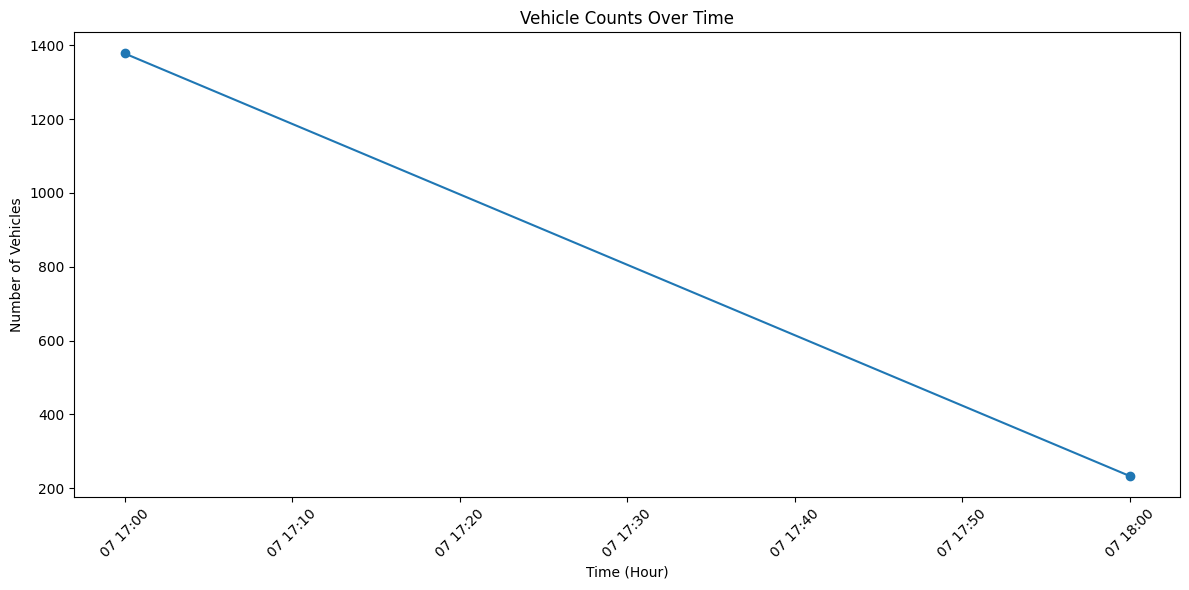

In [19]:
# from db.MongoInstace import MongoInstance
from ssh_pymongo import MongoSession
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime
import pandas as pd
import os

# Initialize MongoDB instance
client = MongoSession(
            str(os.getenv("REMOTE_SERVER")),
            port=22,
            user=str(os.getenv("SSH_USER")),
            password=str(os.getenv("SSH_AUTHENTICATION")),
            uri=str(os.getenv("MONGOSTRING")))
        
database = client.connection["traffic_analysis"]
collection = database['vehicle']

# Retrieve all documents
documents = collection.find()  # Empty query to fetch all

# Count vehicles per timestamp
vehicle_counts = defaultdict(int)

for doc in documents:
    timestamp_str = doc.get('time_stamp')
    if timestamp_str:
        try:
            # Parse timestamp assuming format "dd_mm_yy_HH_MM_SS"
            timestamp = datetime.strptime(timestamp_str, "%d_%m_%y_%H_%M_%S")
            # Group by hour for aggregation
            hour = timestamp.strftime("%Y-%m-%d %H:00")
            vehicle_counts[hour] += 1
        except ValueError as ve:
            print(f"Timestamp parsing error: {ve}")

# Convert to DataFrame for plotting
df = pd.DataFrame(list(vehicle_counts.items()), columns=['Timestamp', 'Counts'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Counts'], marker='o')
plt.xlabel('Time (Hour)')
plt.ylabel('Number of Vehicles')
plt.title('Vehicle Counts Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()